In [53]:
import openpyxl
import copy
from openpyxl import Workbook
import json
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [54]:
def get_values(filename,id = 0,delme = 0):
    wb = openpyxl.load_workbook(filename)
    sheet_names = wb.sheetnames
    print(sheet_names)

    sheet = wb[sheet_names[id]]
    maxrow = sheet.max_row 
    maxcol = sheet.max_column 
    value = sheet.cell(row=2, column=1).value
    alldata = []

    for row in sheet.iter_rows(min_row=1, max_row=maxrow, min_col=1, max_col=maxcol): # type: ignore
        row_data = [cell.value for cell in row]
        alldata.append(row_data)
    station_name = alldata[0][1:]

    if delme:
        del alldata[0]
        for i in range(len(alldata)):
            del alldata[i][0]


    return alldata,station_name

In [55]:
def refineme(data):
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] is None:
                data[i][j] = 0
    return data

In [56]:
def convme(data,title):
    degree = {}
    for i,row in enumerate(data):
        
        degree[title[i]] = sum(row)
        
    return degree



In [57]:
def findme_maxdegreee(degree):
    max_degree = max(degree.values())

    max_degree_node = []
    for key in degree:
        if int(degree[key]) == int(max_degree):
            max_degree_node.append(key)
    return(max_degree,max_degree_node)


In [58]:
MyOD,station_name = get_values('OD.xlsx',delme=1)


['Sheet1']


In [59]:
station_name

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16']

In [60]:
station_index = {}
index_starion = {}
for i , item in enumerate(station_name):
    station_index[item] = i
    index_starion[i] = item

In [61]:
MyOD = refineme(MyOD)

In [62]:
for i in MyOD:
    print(i)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [63]:
with open('OD.json','w') as f:
    json.dump(MyOD,f)
with open('station_name.json','w') as f:
    json.dump(station_name,f)

In [64]:

degree = convme(MyOD,station_name)

In [65]:
degree

{'V1': 0,
 'V2': 1,
 'V3': 0,
 'V4': 0,
 'V5': 2,
 'V6': 2,
 'V7': 1,
 'V8': 4,
 'V9': 1,
 'V10': 2,
 'V11': 1,
 'V12': 0,
 'V13': 1,
 'V14': 0,
 'V15': 1,
 'V16': 1}

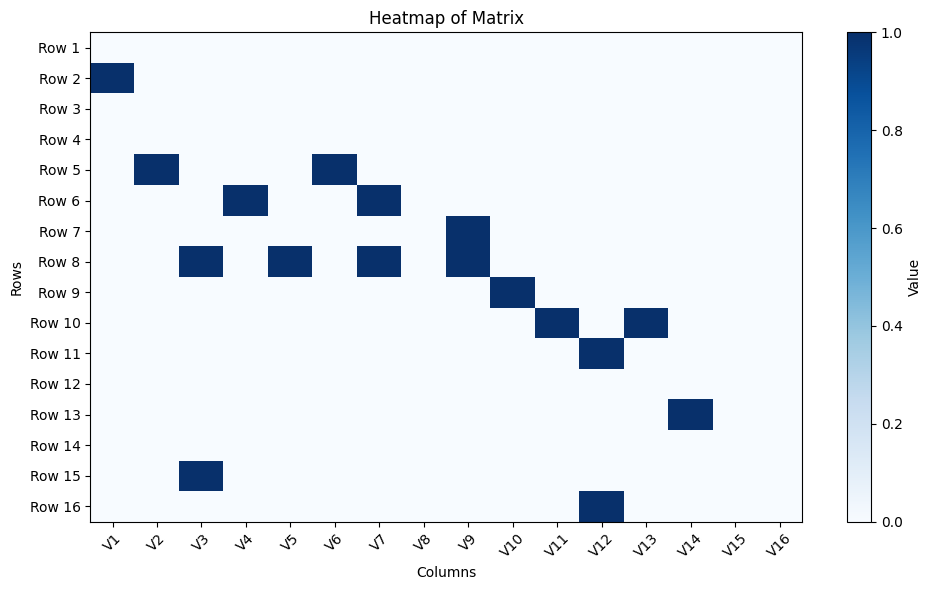

In [66]:
plt.figure(figsize=(10, 6))
MyOD = np.array(MyOD)
plt.imshow(MyOD, cmap='Blues', aspect='auto', interpolation='nearest')
plt.colorbar(label='Value')
plt.xticks(ticks=np.arange(len(station_name)), labels=station_name, rotation=45)
plt.yticks(ticks=np.arange(MyOD.shape[0]), labels=[f'Row {i+1}' for i in range(MyOD.shape[0])])
plt.title('Heatmap of Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()

In [67]:
MyOD

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [68]:
max_degree, max_degree_node = findme_maxdegreee(degree)

In [69]:
max_degree_node[0]

'V8'

In [70]:
station_index[max_degree_node[0]]

7

In [71]:
node_can_go = []
for i,item in enumerate(MyOD[station_index[max_degree_node[0]]]):
    if item:
        node_can_go.append(i)

   

In [72]:
# 创建图
G = nx.from_numpy_array(MyOD, create_using=nx.DiGraph())

# 找到度最大的节点
max_degree_node = max(G.out_degree, key=lambda x: x[1])[0]  # 按出度排序 
reachable_nodes = nx.descendants(G, max_degree_node)  # 从该节点出发可到达的所有节点, 做BFS

# 判断是否能遍历整个图
can_reach_all = len(reachable_nodes) == len(G.nodes) - 1

station_name[max_degree_node], can_reach_all

('V8', False)

In [73]:
def dfs(matrix, start):
    vis_his = []  # 访问历史记录
    visited = []  # 已访问节点列表
    stack = [start]  # 用栈实现深度优先搜索
    vis_his.append(start)

    while stack:
        print(stack)
        node = stack.pop()  # 弹出栈顶节点
        if node not in visited:
            visited.append(node)  # 标记为已访问
            # 将与当前节点相连的未访问节点压入栈中
            for i in range(len(matrix[node]) - 1, -1, -1):  # 从后往前遍历，确保顺序一致
                if matrix[node][i] == 1 and i not in visited:
                    stack.append(i)
                    vis_his.append(i)
    print(vis_his)
    vis_his = list(set(vis_his))
    return visited, vis_his


# BFS函数
def bfs(matrix, start):
    vis_his = []
    visited = []  # 已访问节点列表
    queue = [start]  # 待访问节点队列
    vis_his.append(start)

    while queue:
        
        print(queue)
        node = queue.pop(0)  # 弹出队列头部节点
        if node not in visited:
            visited.append(node)  # 标记为已访问
            # 将与当前节点相连的未访问节点加入队列
            for i in range(len(matrix[node])):
                if matrix[node][i] == 1 and i not in visited:
                    queue.append(i)
                    vis_his.append(i)
    print(vis_his)
    vis_his = list(set(vis_his))
    return visited,vis_his

# 从V8开始（索引为7）
bfs_order, allready_vis = dfs(MyOD, 7)
bfs_order = [index_starion[item] for item in bfs_order]
allready_vis = [index_starion[item] for item in allready_vis]
# new_list = [dist[wanted] item for wanted item in ori_list ]

[7]
[8, 6, 4, 2]
[8, 6, 4]
[8, 6, 5, 1]
[8, 6, 5, 0]
[8, 6, 5]
[8, 6, 6, 3]
[8, 6, 6]
[8, 6, 8]
[8, 6, 9]
[8, 6, 12, 10]
[8, 6, 12, 11]
[8, 6, 12]
[8, 6, 13]
[8, 6]
[8]
[7, 8, 6, 4, 2, 5, 1, 0, 6, 3, 8, 9, 12, 10, 11, 13]


In [74]:
bfs_order

['V8',
 'V3',
 'V5',
 'V2',
 'V1',
 'V6',
 'V4',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14']

In [75]:
allready_vis

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14']

In [76]:
again_visit = [item for item in station_name if item not in allready_vis]

# again_visit = station_name - allready_vis
# new_list = [wanted item for wanted item in ori_list if (requirement)]

In [77]:
again_visit

['V15', 'V16']

In [78]:
bfs_order

['V8',
 'V3',
 'V5',
 'V2',
 'V1',
 'V6',
 'V4',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14']